Notebook to test dataset and dataloader

In [1]:
import trimesh
import numpy as np
import torch
from data.getlandmark import *
import matplotlib.pyplot as plt


In [6]:
#Load face mesh from folder dataset/mesh
v  = trimesh.load("dataset/mesh/FaceTalk_170725_00137_TA.ply", process=False)

#Load random vertex from a frame of the speaker FaceTalk_170725_00137_TA
face_vert_mmap = np.load("dataset/data_verts.npy", mmap_mode='r+', allow_pickle=False, max_header_size=30000)
x = torch.from_numpy(face_vert_mmap)

In [7]:
# Use getlandmark function from data/getlandmark.py to extract landmark
land = get_landmarks(x[0],v)

In [ ]:
# Show landmark in 2d dimension
plt.scatter(land[:,0], land[:,1], marker='.')
plt.show()

Get landmark using vocaset class!

In [1]:
# Get landmark using vocadataset.py
from data.vocaset import *

In [2]:
testset = vocadataset("test", landmark=True)
landmark, labels = testset[0]
print(labels)

she had your dark suit in greasy wash water all year


In [3]:
print("max: ",landmark[0].max().item(), " min: ",landmark[0].min().item())

max:  0.15135173499584198  min:  -0.15600623190402985


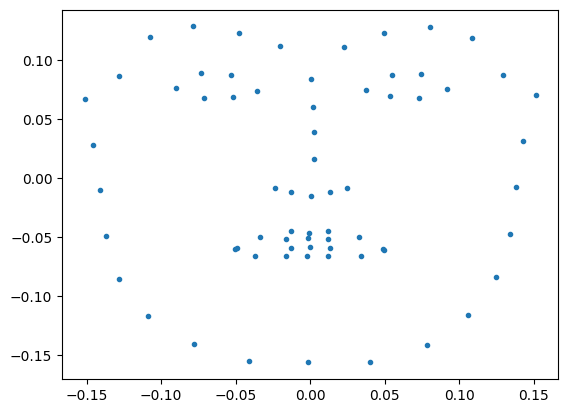

In [4]:
plt.scatter(landmark[0][:,0], landmark[0][:,1], marker='.')
plt.show()

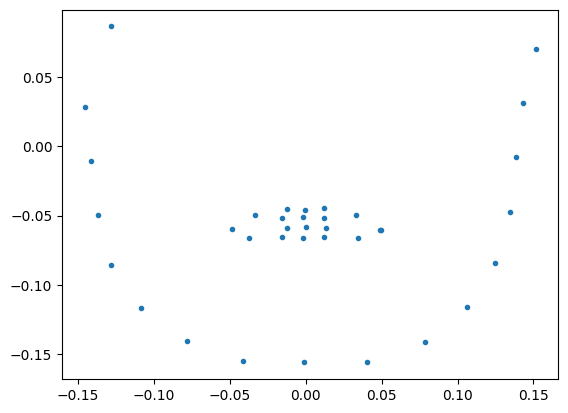

In [5]:
te = vocadataset(type="test", landmark=True, mouthOnly=True)
landmark_mouth, labels = te[0]
plt.scatter(landmark_mouth[0][:,0], landmark_mouth[0][:,1], marker='.')
plt.show()

In [5]:
landmark_mouth.shape

torch.Size([36, 68, 3])

In [34]:
l = [i for i in range(1,18)]+[i for i in range(49,68)]

In [52]:
landmark[0][l].shape

torch.Size([36, 3])

In [36]:
landmark[0][:,0][l].shape

torch.Size([36])

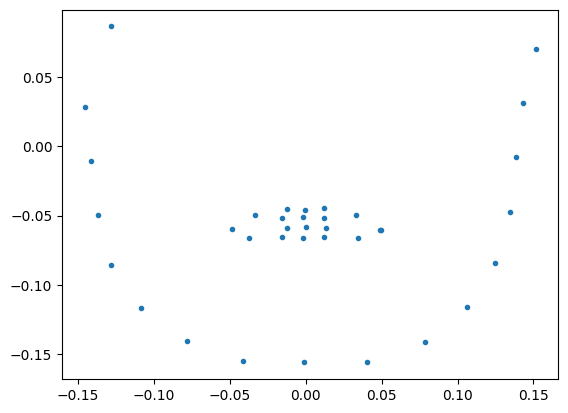

In [51]:
plt.scatter(landmark[0][:,0][l], landmark[0][:,1][l], marker='.')
#plt.scatter(landmark[10][:,0][l], landmark[10][:,1][l], marker='.')
#plt.scatter(landmark[20][:,0][l], landmark[20][:,1][l], marker='.')
#plt.scatter(landmark[100][:,0][l], landmark[100][:,1][l], marker='.')
plt.show()